# **PLS (Partial Least Square)를 이용한 Odor 분석**
---

## **I. Data (Basic, Log)**

### **1. Data Preparation**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_path = "drive/MyDrive/PLS_양돈 농가/"

#### **- Original**

In [ ]:
### 원 데이터

odor = pd.read_csv(data_path + "New_data.csv", encoding="euc-kr")
odor.rename(columns = {"mm.1" : "mm"}, inplace = True)    # 추후 변수명을 편하게 사용하기 위해
odor = odor.drop(["yy", "mm", "dd", "farm"], axis = 1)    # 불필요한 변수 제거
# odor = odor.drop(["측정일", "농장명"], axis = 1)    # 불필요한 변수 제거
print(odor.shape)

(57, 15)


In [ ]:
display(odor.head())
display(np.round(odor.describe(), 3))

,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,300.0,0.56,145.0,12.80,0.025,30.60,17.57,2.78,10.80,3.64,7.72,2.84,0.03,0.20,3.00
1,300.0,0.62,310.0,462.00,0.025,916.52,1055.96,109.07,977.44,319.49,619.49,30.51,137.81,3.60,10.40
2,448.0,0.97,90.5,63.90,0.025,663.42,737.23,73.94,837.83,215.64,469.79,14.61,67.52,0.94,3.92
3,2080.0,1.02,344.0,13.00,0.630,490.79,570.61,51.09,719.27,168.48,237.64,8.90,60.56,5.55,7.31
4,310.0,1.18,312.0,0.04,0.025,404.53,468.03,43.17,573.75,157.22,205.67,9.21,69.90,0.20,5.43


,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,1579.649,5.894,364.623,11.989,0.184,533.212,398.673,38.327,338.586,99.495,191.457,13.147,74.291,2.422,4.429
std,1521.333,5.156,401.594,61.543,0.605,548.733,381.129,36.946,317.637,121.992,305.561,18.817,78.959,3.480,5.221
min,100.000,0.560,22.900,0.040,0.025,0.170,0.170,0.930,0.470,1.580,0.270,0.050,0.030,0.200,0.190
25%,448.000,2.080,86.000,0.040,0.025,71.480,77.500,9.260,46.550,21.470,29.800,3.870,16.620,0.200,1.430
50%,1000.000,4.150,268.000,0.040,0.025,357.890,383.930,35.580,235.890,73.400,89.920,9.220,60.560,1.060,2.750
75%,2080.000,9.540,457.000,2.550,0.025,885.900,505.400,47.950,547.440,135.790,207.800,14.610,98.700,3.600,5.430
max,6694.000,22.240,1754.000,462.000,3.490,2446.000,2109.690,217.170,1455.520,743.690,1869.400,125.720,481.200,22.260,34.570


#### **- 결측값 확인 및 처리**

- ND → MDL/2
- NA → Multiple Imputation Method

In [ ]:
### 결측값 확인
num_na = odor.isna().sum().sum()
num_nd = odor.apply(lambda x : (x == "ND").sum(), axis = 0).sum()

print("NA 개수 :", num_na, " ND 개수 :",  num_nd)
display(pd.DataFrame(odor.isna().sum()).transpose())
display(pd.DataFrame(odor.apply(lambda x : (x == "ND").sum(), axis = 0)).transpose())

NA 개수 : 0  ND 개수 : 0


,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
mdl = pd.read_csv(data_path + "MDL.csv")
# mdl.columns = odor.columns[1:]
mdl

,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,0.08,0.06,0.07,0.08,0.05,0.07,0.34,0.52,0.93,0.49,0.53,0.09,0.06,0.4,0.38


In [ ]:
!pip install impyute

In [ ]:
### 결측치 처리

# ND 값 → MDL/2
if num_nd != 0 :
  for i in range(1, odor.shape[1]) :
    var = odor.columns[i]
    odor[var] = odor[var].replace("ND", mdl[var][0]/2)

odor = (odor).astype(float)


# 결측값 → M.I method
from impyute.imputation.cs import mice
if num_na != 0 :
  odor = pd.DataFrame(mice(odor.values))



# 결측값 확인
num_na = odor.isna().sum().sum()
num_nd = odor.apply(lambda x : (x == "ND").sum(), axis = 0).sum()

print("NA 개수 :", num_na, " ND 개수 :",  num_nd)
display(odor.head())

NA 개수 : 0  ND 개수 : 0


,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,300.0,0.56,145.0,12.80,0.025,30.60,17.57,2.78,10.80,3.64,7.72,2.84,0.03,0.20,3.00
1,300.0,0.62,310.0,462.00,0.025,916.52,1055.96,109.07,977.44,319.49,619.49,30.51,137.81,3.60,10.40
2,448.0,0.97,90.5,63.90,0.025,663.42,737.23,73.94,837.83,215.64,469.79,14.61,67.52,0.94,3.92
3,2080.0,1.02,344.0,13.00,0.630,490.79,570.61,51.09,719.27,168.48,237.64,8.90,60.56,5.55,7.31
4,310.0,1.18,312.0,0.04,0.025,404.53,468.03,43.17,573.75,157.22,205.67,9.21,69.90,0.20,5.43


#### **- log dataset**

In [ ]:
### Response variables에 log화
# log_odor = pd.concat([np.log(odor["ou"]), odor.iloc[:,1:]], axis = 1)
log_odor = np.log(odor)

display(log_odor.head())
display(np.round(log_odor.describe(), 3))

,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,5.703782,-0.579818,4.976734,2.549445,-3.688879,3.421000,2.866193,1.022451,2.379546,1.291984,2.043814,1.043804,-3.506558,-1.609438,1.098612
1,5.703782,-0.478036,5.736572,6.135565,-3.688879,6.820584,6.962206,4.691990,6.884937,5.766726,6.428897,3.418054,4.925876,1.280934,2.341806
2,6.104793,-0.030459,4.505350,4.157319,-3.688879,6.497408,6.602900,4.303254,6.730815,5.373610,6.152286,2.681706,4.212424,-0.061875,1.366092
3,7.640123,0.019803,5.840642,2.564949,-0.462035,6.196016,6.346706,3.933589,6.578237,5.126817,5.470757,2.186051,4.103635,1.713798,1.989243
4,5.736572,0.165514,5.743003,-3.218876,-3.688879,6.002726,6.148532,3.765146,6.352194,5.057646,5.326273,2.220290,4.247066,-1.609438,1.691939


,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,6.920,1.374,5.368,-1.332,-3.329,5.405,5.271,3.120,5.070,3.883,4.272,1.925,3.662,0.014,0.869
std,0.992,0.956,1.087,2.661,1.188,1.846,1.693,1.210,1.607,1.393,1.666,1.371,1.506,1.411,1.308
min,4.605,-0.580,3.131,-3.219,-3.689,-1.772,-1.772,-0.073,-0.755,0.457,-1.309,-2.996,-3.507,-1.609,-1.661
25%,6.105,0.732,4.454,-3.219,-3.689,4.269,4.350,2.226,3.841,3.067,3.395,1.353,2.811,-1.609,0.358
50%,6.908,1.423,5.591,-3.219,-3.689,5.880,5.950,3.572,5.463,4.296,4.499,2.221,4.104,0.058,1.012
75%,7.640,2.255,6.125,0.936,-3.689,6.787,6.225,3.870,6.305,4.911,5.337,2.682,4.592,1.281,1.692
max,8.809,3.102,7.470,6.136,1.250,7.802,7.654,5.381,7.283,6.612,7.533,4.834,6.176,3.103,3.543


### **2. Visualization**

#### **- Response variable**

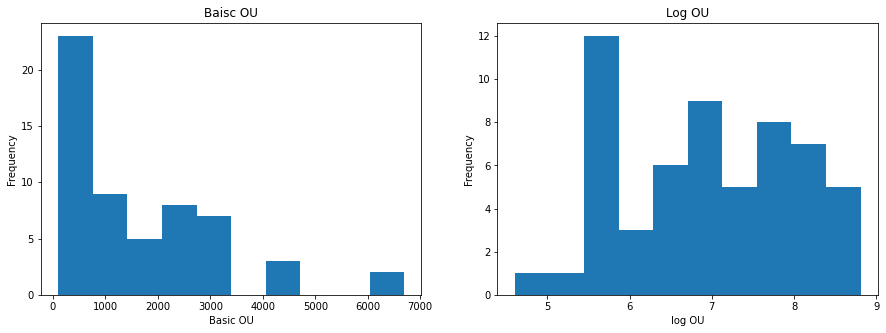

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.hist(odor["ou"])
plt.title("Baisc OU")
plt.xlabel("Basic OU")  ; plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(log_odor["ou"])
plt.title("Log OU")
plt.xlabel("log OU")  ; plt.ylabel("Frequency")

plt.show()

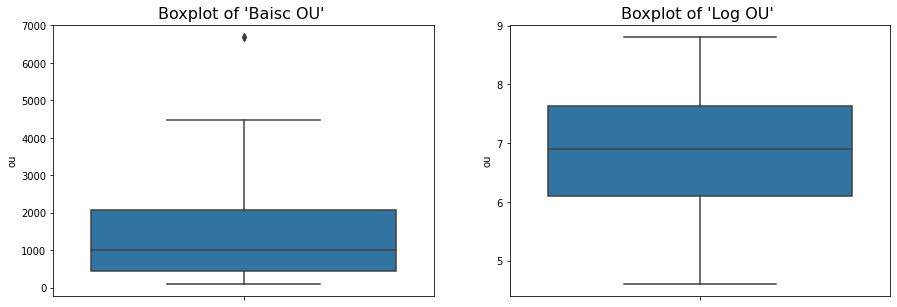

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.boxplot(y = odor["ou"])
plt.title("Boxplot of 'Baisc OU' ", fontsize = 16)

plt.subplot(1,2,2)
sns.boxplot(y = log_odor["ou"])
plt.title("Boxplot of 'Log OU' ", fontsize = 16)
plt.show()

#### **- Explanatory variables**

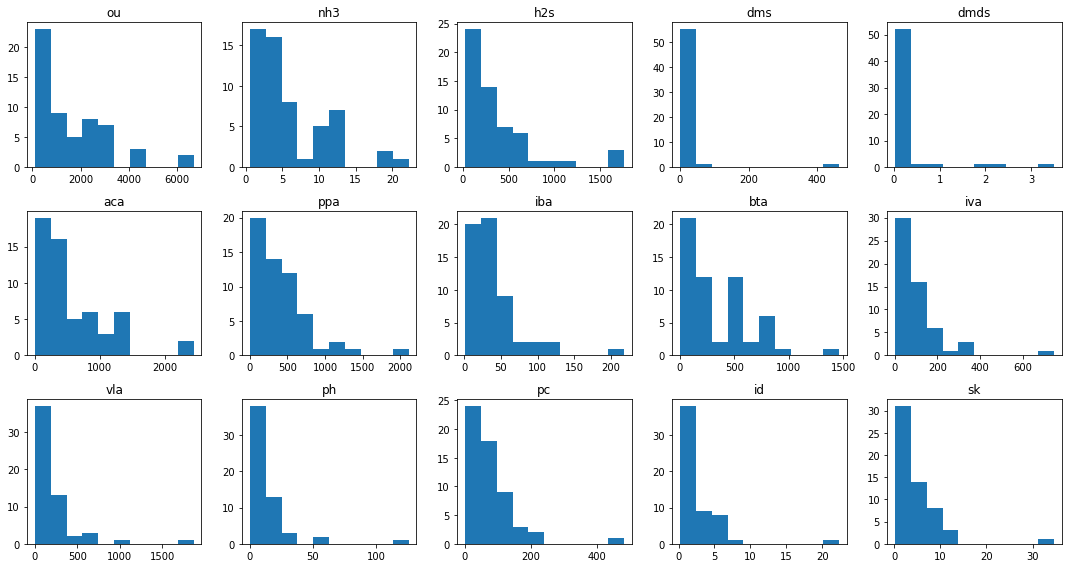

In [ ]:
plt.figure(figsize = (15, 8))

for i in range(odor.shape[1]) :
  plt.subplot(3, 5, i+1)
  plt.hist(odor.iloc[:, i])
  plt.title(odor.columns[i])

plt.tight_layout()
plt.show()

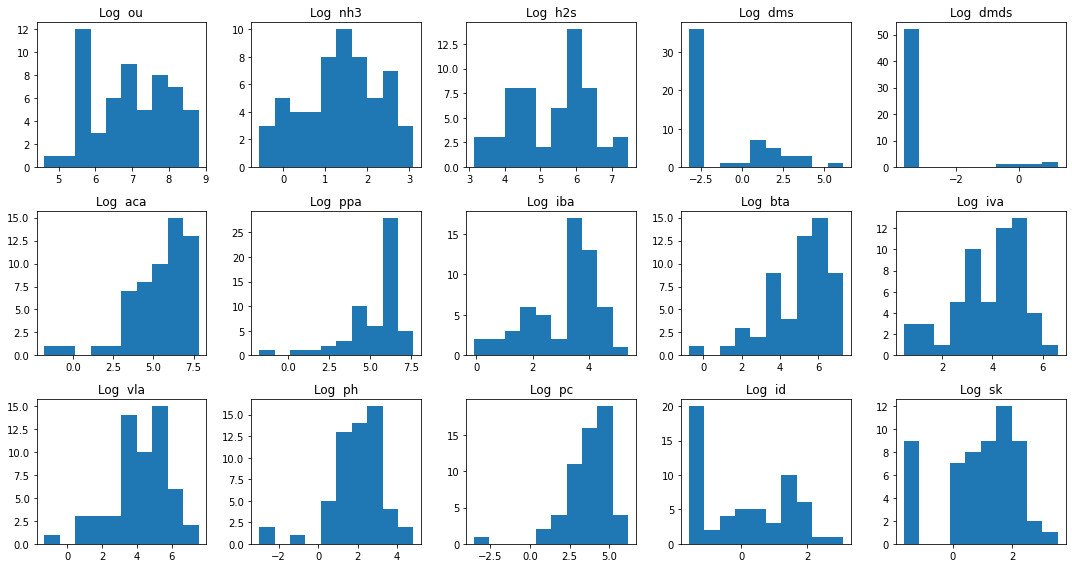

In [ ]:
plt.figure(figsize = (15, 8))

for i in range(log_odor.shape[1]) :
  plt.subplot(3, 5, i+1)
  plt.hist(log_odor.iloc[:, i])
  plt.title("Log  " + log_odor.columns[i])

plt.tight_layout()
plt.show()

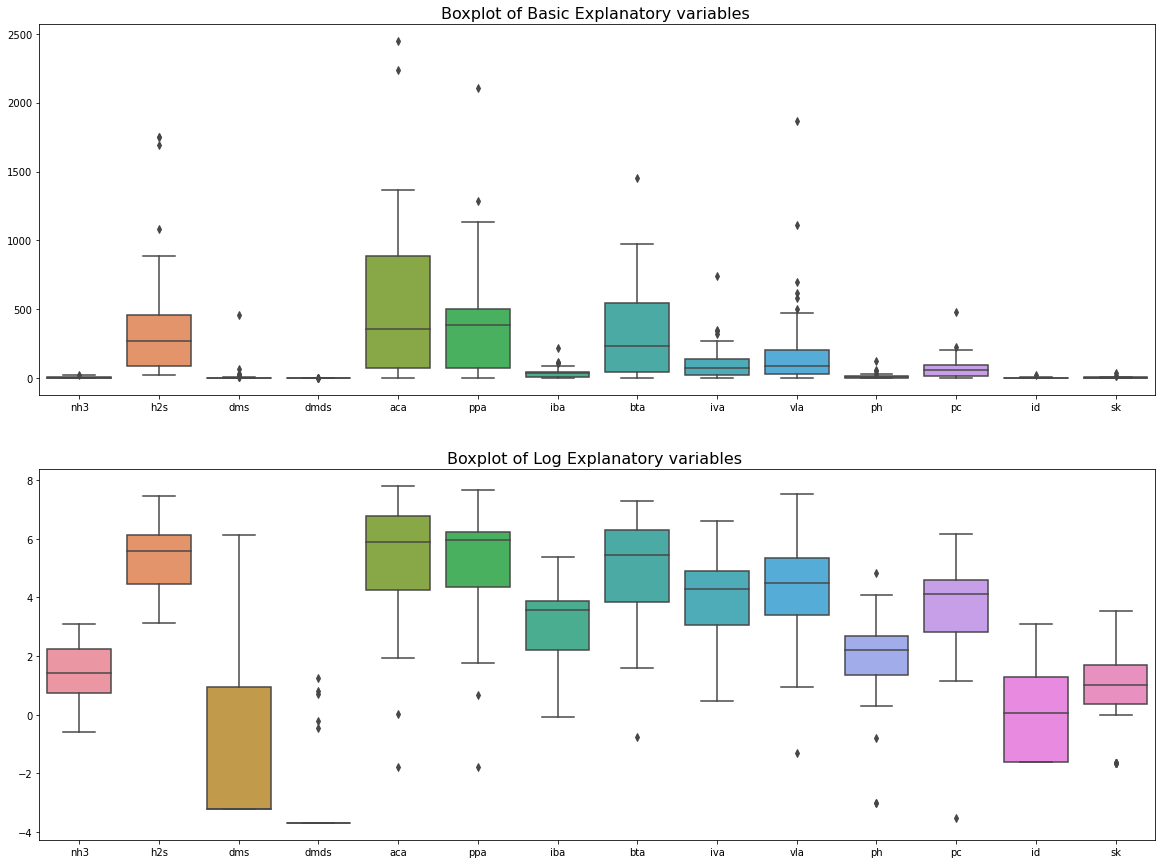

In [ ]:
plt.figure(figsize = (20, 15))

plt.subplot(2, 1, 1)
sns.boxplot(data = odor.iloc[:,1:])
plt.title("Boxplot of Basic Explanatory variables ", fontsize = 16)

plt.subplot(2, 1, 2)
sns.boxplot(data = log_odor.iloc[:,1:])
plt.title("Boxplot of Log Explanatory variables ", fontsize = 16)

plt.show()

### **3. Correlation**

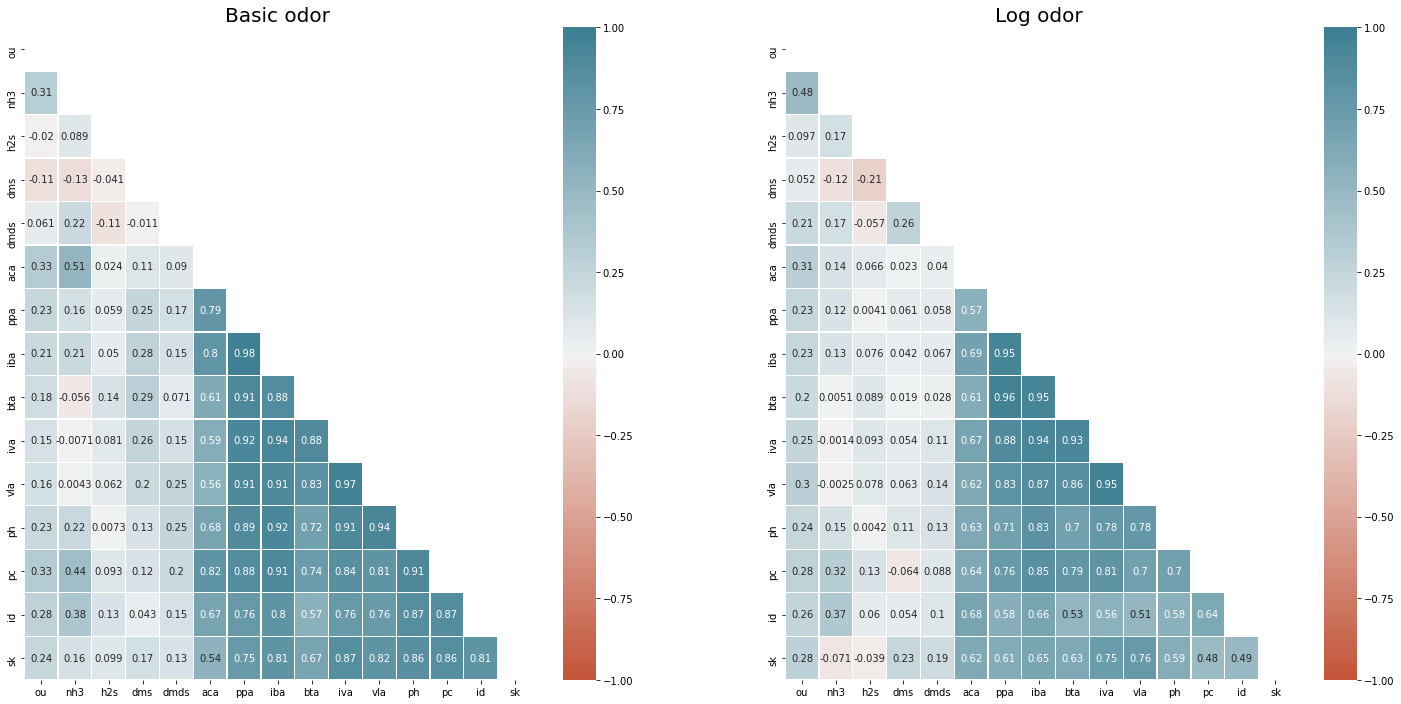

In [ ]:
basic_corr = odor.corr()
log_corr = log_odor.corr()

### 그래프의 윗부분을 공백화
mask = np.zeros_like(basic_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (25,12))

### Basic 
plt.subplot(1,2,1)
sns.heatmap(basic_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Basic odor", fontsize = 20)

### Log
plt.subplot(1,2,2)
sns.heatmap(log_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Log odor", fontsize = 20)

plt.show()

Basic Max Corrleation : 0.334
Log Max Corrleation : 0.478


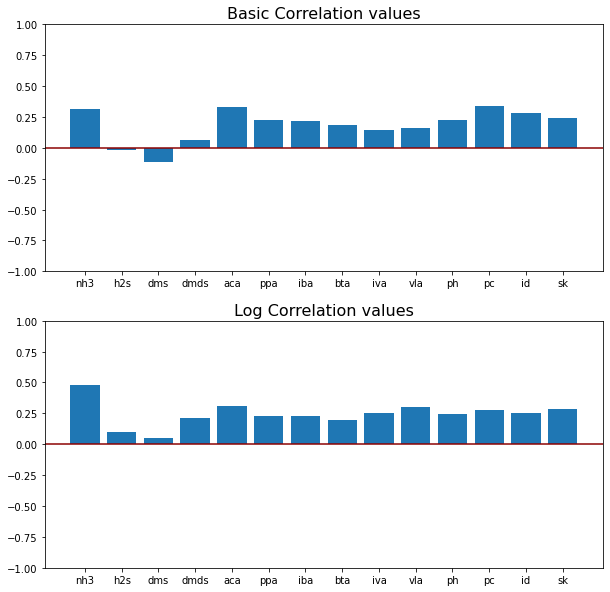

In [ ]:
print("Basic Max Corrleation :", np.round(max(basic_corr.iloc[0, 1:]), 3))
print("Log Max Corrleation :", np.round(max(log_corr.iloc[0, 1:]), 3))


### Basic Response에 대한 설명변수의 correlation
plt.figure(figsize = (10, 10))

plt.subplot(2, 1, 1)
plt.bar(range(basic_corr.shape[1]-1), basic_corr.iloc[0, 1:],)
plt.xticks(range(basic_corr.shape[1]-1), labels = basic_corr.columns[1:])
plt.ylim(-1, 1)
plt.axhline(0, linestyle = "-", color = "darkred")
plt.title("Basic Correlation values", fontsize = 16)


### Log Response에 대한 설명변수의 correlation
plt.subplot(2, 1, 2)
plt.bar(range(log_corr.shape[1]-1), log_corr.iloc[0, 1:],)
plt.xticks(range(log_corr.shape[1]-1), labels = log_corr.columns[1:])
plt.ylim(-1, 1)
plt.axhline(0, linestyle = "-", color = "darkred")
plt.title("Log Correlation values", fontsize = 16)


plt.show()

### **4. VIF**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

basic_model = ols("ou ~ " + " + ".join(odor.columns), data = odor).fit()
# basic_model.summary()
X = odor.iloc[:, 1:]

### Baisc
basic_vif = pd.DataFrame()
basic_vif["Basic VIF"] = [np.round(variance_inflation_factor(X.values, i), 3) for i in range(X.shape[1])]
basic_vif = basic_vif.transpose()
basic_vif.columns = X.columns
display(basic_vif)


### Log
log_vif = pd.DataFrame()
log_vif["Log VIF"] = [np.round(variance_inflation_factor(X.values, i), 3) for i in range(X.shape[1])]
log_vif = log_vif.transpose()
log_vif.columns = X.columns
display(log_vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
Basic VIF,7.867,2.204,1.589,1.601,21.531,185.484,332.048,50.409,199.538,62.873,65.575,49.936,8.936,16.339


,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
Log VIF,7.867,2.204,1.589,1.601,21.531,185.484,332.048,50.409,199.538,62.873,65.575,49.936,8.936,16.339


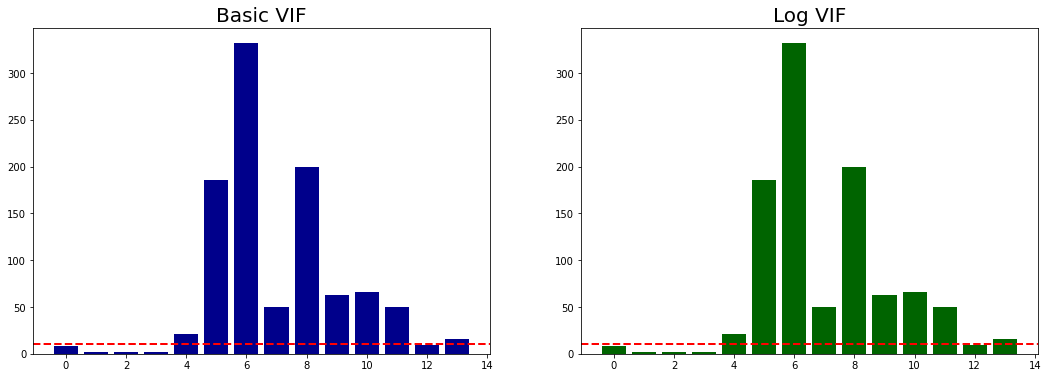

In [ ]:
plt.figure(figsize = (18, 6))

plt.subplot(1,2,1)
plt.bar(range(basic_vif.shape[1]), basic_vif.iloc[0,:], color = "darkblue")
plt.axhline(10, linestyle = "--", color = "r", linewidth = 2)
plt.title("Basic VIF", fontsize = 20)

plt.subplot(1,2,2)
plt.bar(range(log_vif.shape[1]), log_vif.iloc[0, :], color = "darkgreen")
plt.axhline(10, linestyle = "--", color = "r", linewidth = 2)
plt.title("Log VIF", fontsize = 20)

plt.show()

## **II. Variables Extraction**

### **0. Standardization**

In [ ]:
### Dataset Standardiaztion
from sklearn.preprocessing import StandardScaler


### Baisc
st_odor = StandardScaler().fit_transform(odor)
st_odor = pd.DataFrame(st_odor, columns = odor.columns)
print("Basic  Mean : ", np.round(st_odor.mean(),3)[10], "  Std : ", np.round(st_odor.std(), 3)[10])
display(st_odor.head(3))


### Log
log_st_odor = StandardScaler().fit_transform(log_odor)
log_st_odor = pd.DataFrame(log_st_odor, columns = log_odor.columns)
print("\n\nLog  Mean : ", np.round(log_st_odor.mean(),3)[10], "  Std : ", np.round(log_st_odor.std(), 3)[10])
display(log_st_odor.head(3))

Basic  Mean :  -0.0   Std :  1.009


,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,-0.848614,-1.043712,-0.551739,0.013296,-0.265563,-0.924093,-1.008822,-0.970688,-1.041122,-0.792735,-0.606655,-0.552642,-0.948861,-0.644286,-0.276059
1,-0.848614,-1.031973,-0.137224,7.377081,-0.265563,0.704742,1.739909,1.931804,2.029148,1.819390,1.413260,0.930918,0.811597,0.341523,1.153900
2,-0.750466,-0.963493,-0.688655,0.850984,-0.265563,0.239397,0.896196,0.972499,1.585714,0.960535,0.918987,0.078421,-0.086520,-0.429727,-0.098280




Log  Mean :  0.0   Std :  1.009


,ou,nh3,h2s,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,-1.235849,-2.061472,-0.363296,1.471740,-0.30591,-1.084505,-1.433378,-1.748890,-1.688962,-1.876210,-1.349337,-0.648372,-4.803546,-1.160738,0.177013
1,-1.235849,-1.954099,0.341793,2.831587,-0.30591,0.773626,1.007934,1.310006,1.139025,1.363714,1.306571,1.099294,0.847229,0.905243,1.135620
2,-0.828202,-1.481942,-0.800714,2.081442,-0.30591,0.596986,0.793780,0.985959,1.042285,1.079080,1.139036,0.557274,0.369128,-0.054571,0.383262


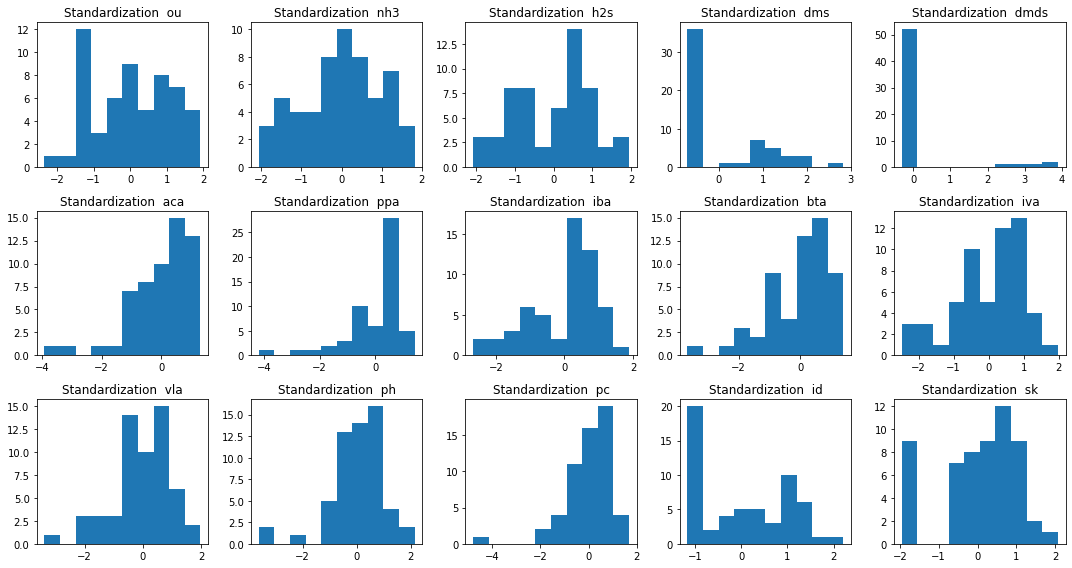

In [ ]:
plt.figure(figsize = (15, 8))

for i in range(st_odor.shape[1]) :
  plt.subplot(3, 5, i+1)
  plt.hist(log_st_odor.iloc[:, i])
  plt.title("Standardization  " + st_odor.columns[i])

plt.tight_layout()
plt.show()

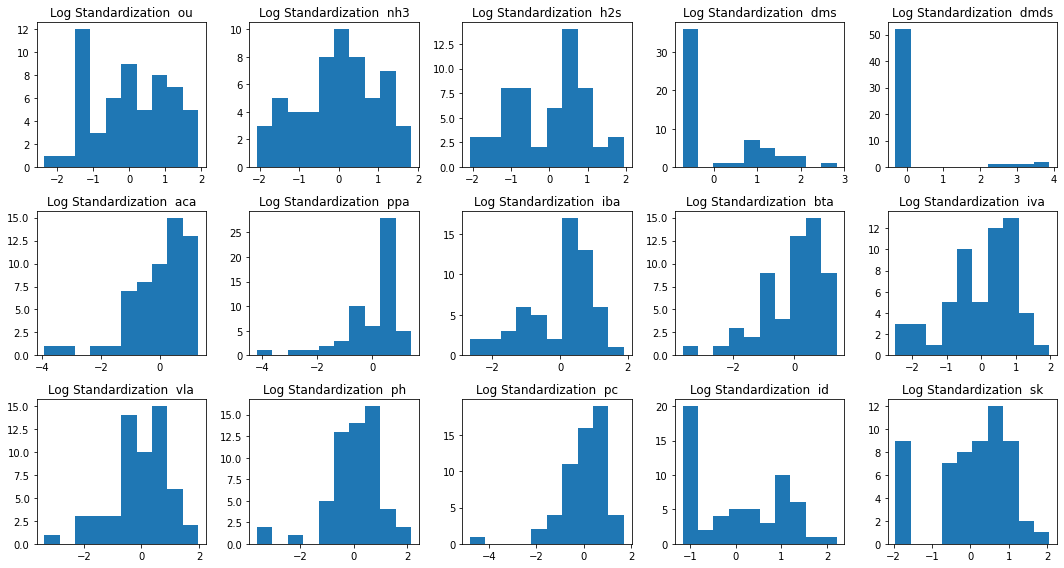

In [ ]:
plt.figure(figsize = (15, 8))

for i in range(log_st_odor.shape[1]) :
  plt.subplot(3, 5, i+1)
  plt.hist(log_st_odor.iloc[:, i])
  plt.title("Log Standardization  " + log_st_odor.columns[i])

plt.tight_layout()
plt.show()

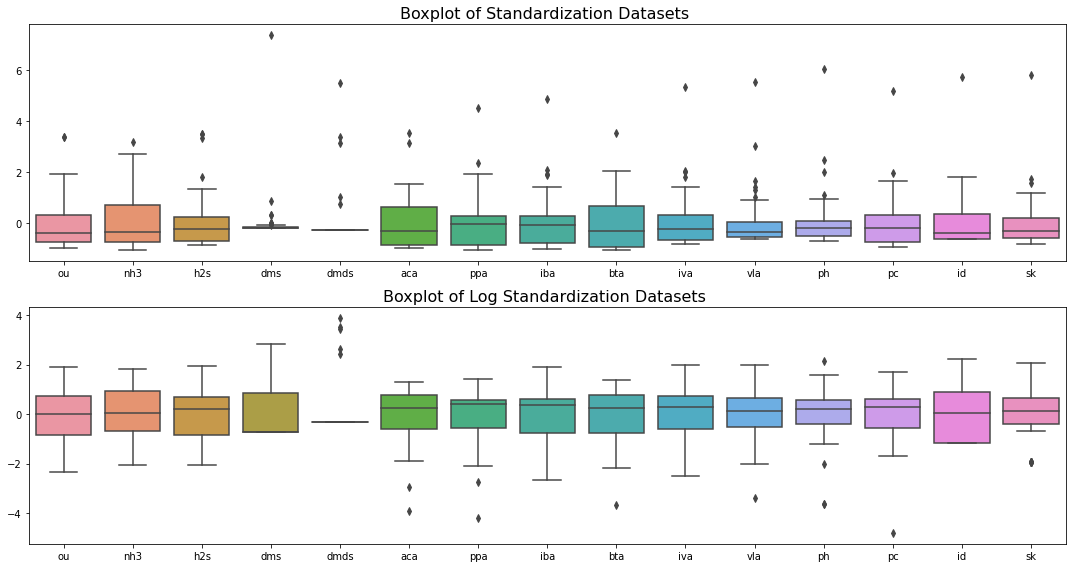

In [ ]:
plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
sns.boxplot(data = st_odor)
plt.title("Boxplot of Standardization Datasets ", fontsize = 16)

plt.subplot(2, 1, 2)
sns.boxplot(data = log_st_odor)
plt.title("Boxplot of Log Standardization Datasets ", fontsize = 16)

plt.tight_layout()
plt.show()

### **1. PLS (basic_pls, log_pls)**

#### **- Best Components**

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

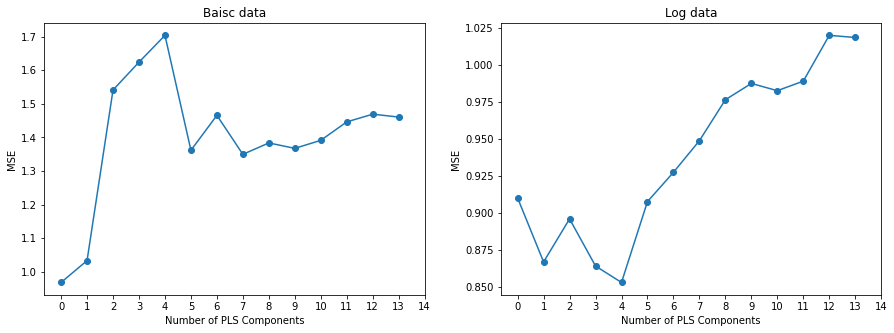

In [ ]:
### PLS
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from tqdm.notebook import tqdm

### Basic
comp = st_odor.shape[1]   # 생성할 최대 components 수
pls_X = st_odor.iloc[:, 1:]
pls_y = st_odor.iloc[:, 0]

cv = RepeatedKFold(n_splits = st_odor.shape[0], n_repeats = 3, random_state = 1)
mse = []
n = len(pls_X)

for i in tqdm(np.arange(1, comp)) :
    pls = PLSRegression(n_components = i)
    score = -1*model_selection.cross_val_score(pls, pls_X, pls_y, cv = cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)


### Log
log_comp = log_st_odor.shape[1]   # 생성할 최대 components 수
log_pls_X = log_st_odor.iloc[:, 1:]
log_pls_y = log_st_odor.iloc[:, 0]

cv = RepeatedKFold(n_splits = log_st_odor.shape[0], n_repeats = 3, random_state = 1)
log_mse = []
n = len(log_pls_X)

for i in tqdm(np.arange(1, comp)) :
    pls = PLSRegression(n_components = i)
    score = -1*model_selection.cross_val_score(pls, log_pls_X, log_pls_y, cv = cv,
               scoring = "neg_mean_squared_error").mean()
    log_mse.append(score)


### plot test MSE vs. number of components
plt.figure(figsize = (15, 5))

# Basic
plt.subplot(1, 2, 1)
plt.plot(mse, marker = "o")
plt.xticks(range(0, comp))
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title("Baisc data")

# Log
plt.subplot(1, 2, 2)
plt.plot(log_mse, marker = "o")
plt.xticks(range(0, log_comp))
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title("Log data")

plt.show()

In [ ]:
### 최적의 Component
pls_bc = mse.index(min(mse)) + 1
if pls_bc == 1 : pls_bc = 2

log_pls_bc = log_mse.index(min(log_mse)) + 1
if log_pls_bc == 1 : log_pls_bc = 2

print("Baisc best comp value :", np.round(mse[pls_bc-1], 3))
print("Baisc best comp :", pls_bc)


print("\n\nLog best comp value :", np.round(log_mse[log_pls_bc-1], 3))
print("Log best comp :", log_pls_bc)

Baisc best comp value : 1.033
Baisc best comp : 2


Log best comp value : 0.853
Log best comp : 5


#### **- PLS Dataset**

In [ ]:
### Dataset 재구성
from sklearn.cross_decomposition import PLSRegression


### Basic
pls_X = st_odor.iloc[:, 1:]
pls_y = st_odor.iloc[:, 0]
# pls_bc = 2

pls = PLSRegression(n_components = pls_bc)
pls_fit = pls.fit_transform(pls_X, pls_y)
pls_X_data = pd.DataFrame(pls_fit[0])
# pls_y_data = pd.DataFrame(pls_fit[1])

# y = y / X = pls(X)
basic_pls = pd.concat([odor["ou"], pls_X_data], axis = 1)
colnames = ["ou"] + ["comp{}".format(i) for i in range(1, pls_bc + 1)]
basic_pls.columns = colnames
display(basic_pls.head())


### Basic
log_pls_X = log_st_odor.iloc[:, 1:]
log_pls_y = log_st_odor.iloc[:, 0]
# log_pls_bc = 2

log_pls = PLSRegression(n_components = log_pls_bc)
log_pls_fit = log_pls.fit_transform(log_pls_X, log_pls_y)
log_pls_X_data = pd.DataFrame(log_pls_fit[0])
# pls_y_data = pd.DataFrame(pls_fit[1])

# y = y / X = pls(X)
log_pls = pd.concat([log_odor["ou"], log_pls_X_data], axis = 1)
log_colnames = ["log_ou"] + ["log_comp{}".format(i) for i in range(1, log_pls_bc + 1)]
log_pls.columns = log_colnames
display(log_pls.head())

,ou,comp1,comp2
0,300.0,-2.567322,-0.495194
1,300.0,1.874246,-5.454443
2,448.0,0.609731,-1.886362
3,2080.0,0.598136,-0.990755
4,310.0,-0.324451,-0.936818


,log_ou,log_comp1,log_comp2,log_comp3,log_comp4,log_comp5
0,5.703782,-5.090783,-0.972973,-1.002910,1.962086,0.652895
1,5.703782,1.989565,-2.306348,0.320053,1.910846,-0.099715
2,6.104793,1.011294,-2.015622,-0.299369,1.006960,-0.875056
3,7.640123,1.715313,-0.689934,0.948677,2.681971,-0.089226
4,5.736572,0.276935,-1.661382,-0.524759,-0.579652,0.291043


#### **- VIF**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

basic_pls_model = ols("ou ~ " + " + ".join(basic_pls.columns[1:]), data = basic_pls).fit()
X = basic_pls.iloc[:, 1:]

### Baisc
basic_pls_vif = pd.DataFrame()
basic_pls_vif["Basic PLS VIF"] = [np.round(variance_inflation_factor(X.values, i), 3) for i in range(X.shape[1])]
basic_pls_vif = basic_pls_vif.transpose()
basic_pls_vif.columns = X.columns
display(basic_pls_vif)


### Log
log_pls_model = ols("log_ou ~ " + " + ".join(log_pls.columns[1:]), data = log_pls).fit()
log_X = log_pls.iloc[:, 1:]

log_pls_vif = pd.DataFrame()
log_pls_vif["Log PLS VIF"] = [np.round(variance_inflation_factor(log_X.values, i), 3) for i in range(log_X.shape[1])]
log_pls_vif = log_pls_vif.transpose()
log_pls_vif.columns = log_X.columns
display(log_pls_vif)


,comp1,comp2
Basic PLS VIF,1.0,1.0


,log_comp1,log_comp2,log_comp3,log_comp4,log_comp5
Log PLS VIF,1.0,1.0,1.0,1.0,1.0


### **2. PCA (basic_pca, log_pca)**

#### **- Best Components**

Basic Component 3개 :  0.798
Basic Component 5개 :  0.924
Basic Component 10개 :  0.996
Log Component 3개 :  0.744
Log Component 5개 :  0.859
Log Component 10개 :  0.988


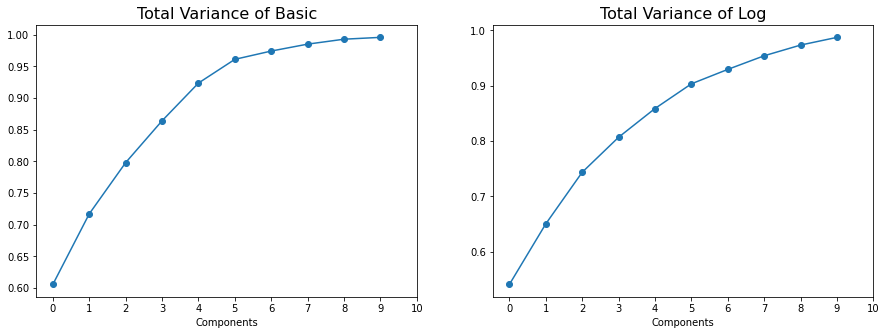

In [ ]:
### PCA
from sklearn.decomposition import PCA

### Basic
comp = 10   # 생성할 최대 components 수

# PCA
pca = PCA(n_components = comp)
pca_fit = pca.fit_transform(st_odor.iloc[:, 1:])

# PC의 분산
var = pca.explained_variance_ratio_
cs_var = [sum(var[:i+1]) for i in range(len(var))]

print("Basic Component 3개 : " , np.round(cs_var[2], 3))
print("Basic Component 5개 : " , np.round(cs_var[4], 3))
print("Basic Component 10개 : " , np.round(cs_var[-1], 3))


### Log
log_comp = 10   # 생성할 최대 components 수

# PCA
log_pca = PCA(n_components = log_comp)
log_pca_fit = log_pca.fit_transform(log_st_odor.iloc[:, 1:])

# PC의 분산
log_var = log_pca.explained_variance_ratio_
log_cs_var = [sum(log_var[:i+1]) for i in range(len(log_var))]

print("Log Component 3개 : " , np.round(log_cs_var[2], 3))
print("Log Component 5개 : " , np.round(log_cs_var[4], 3))
print("Log Component 10개 : " , np.round(log_cs_var[-1], 3))




### Plot
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(cs_var, marker = "o")
plt.xticks(range(0, comp+1))
plt.xlabel("Components")
plt.title("Total Variance of Basic", fontsize = 16)


plt.subplot(1, 2, 2)
plt.plot(log_cs_var, marker = "o")
plt.xticks(range(0, log_comp+1))
plt.xlabel("Components")
plt.title("Total Variance of Log", fontsize = 16)


plt.show()

In [ ]:
baseline = 0.9

basic_pca_comp = np.where(np.array(cs_var) >= baseline)[0][0] + 1
log_pca_comp = np.where(np.array(log_cs_var) >= baseline)[0][0] + 1

print("Basic PCA Component : ", basic_pca_comp)
print("Log PCA Component : ", log_pca_comp)

Basic PCA Component :  5
Log PCA Component :  6


#### **- PCA Dataset**

In [ ]:
### PCA로 생성된 데이터셋

### Basic
pca_X = pd.DataFrame(pca_fit).iloc[:, :basic_pca_comp]
pca_X.columns = ["comp{}".format(i) for i in range(1, basic_pca_comp + 1)]

basic_pca = pd.concat([odor["ou"], pca_X], axis = 1)
display(basic_pca.head())


### Log
log_pca_X = pd.DataFrame(log_pca_fit).iloc[:, :log_pca_comp]

log_pca = pd.concat([log_odor["ou"], log_pca_X], axis = 1)
log_pca.columns = ["log_ou"] + ["log_comp{}".format(i) for i in range(1, log_pca_comp + 1)]

display(log_pca.head())

,ou,comp1,comp2,comp3,comp4,comp5
0,300.0,-2.552046,0.729137,0.414550,-0.245970,-0.381188
1,300.0,4.525415,4.738764,0.843991,4.348957,3.300636
2,448.0,1.543771,2.012124,0.506773,0.502643,-0.185640
3,2080.0,1.112714,0.908954,0.351468,-0.749870,0.209651
4,310.0,0.095715,1.164742,-0.058346,-0.360262,-0.366685


,log_ou,log_comp1,log_comp2,log_comp3,log_comp4,log_comp5,log_comp6
0,5.703782,5.114718,2.974550,-0.661322,0.557947,-1.696541,-0.534102
1,5.703782,-3.422654,2.471918,-0.671300,0.737490,-1.706786,1.217891
2,6.104793,-2.202752,2.387238,-0.814986,-0.073273,-0.531038,1.051193
3,7.640123,-2.241027,1.977694,1.075819,1.669455,-0.156395,-0.449590
4,5.736572,-1.204520,0.385454,-1.865547,0.833411,0.548526,-0.385921


#### **- VIF**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

basic_pca_model = ols("ou ~ " + " + ".join(basic_pca.columns[1:]), data = basic_pca).fit()
X = basic_pca.iloc[:, 1:]

### Baisc
basic_pca_vif = pd.DataFrame()
basic_pca_vif["Basic pca VIF"] = [np.round(variance_inflation_factor(X.values, i), 3) for i in range(X.shape[1])]
basic_pca_vif = basic_pca_vif.transpose()
basic_pca_vif.columns = X.columns
display(basic_pca_vif)


### Log
log_pca_model = ols("log_ou ~ " + " + ".join(log_pca.columns[1:]), data = log_pca).fit()
log_X = log_pca.iloc[:, 1:]

log_pca_vif = pd.DataFrame()
log_pca_vif["Log pca VIF"] = [np.round(variance_inflation_factor(log_X.values, i), 3) for i in range(log_X.shape[1])]
log_pca_vif = log_pca_vif.transpose()
log_pca_vif.columns = log_X.columns
display(log_pca_vif)

,comp1,comp2,comp3,comp4,comp5
Basic pca VIF,1.0,1.0,1.0,1.0,1.0


,log_comp1,log_comp2,log_comp3,log_comp4,log_comp5,log_comp6
Log pca VIF,1.0,1.0,1.0,1.0,1.0,1.0


## **III. Regression**

### **1. PLS**

#### **1) Basic**

##### **- Summary**

In [ ]:
from statsmodels.formula.api import ols

basic_pls_reg = ols("ou ~ " + " + ".join(basic_pls.columns[1:]), data = basic_pls).fit()
basic_pls_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ou   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     5.428
Date:                Mon, 13 Sep 2021   Prob (F-statistic):            0.00711
Time:                        11:20:11   Log-Likelihood:                -492.81
No. Observations:                  57   AIC:                             991.6
Df Residuals:                      54   BIC:                             997.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1579.6491    187.243      8.436      0.000    1204.250    1955.048
comp1        180.7774     71.116      2.542      0.014      38.198     323.357
comp2        306.1206    146.028      2.096      0.041      13.351     598.890
==============================================================================
Omnibus:                       31.425   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.692
Skew:                           1.801   Prob(JB):                     4.02e-14
Kurtosis:                       6.606   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### **- Correlation**

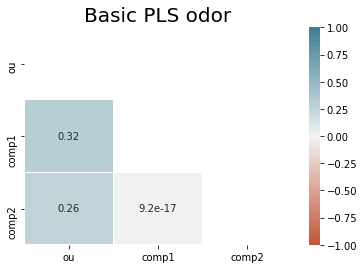

In [ ]:
basic_pls_corr = basic_pls.corr()

### 그래프의 윗부분을 공백화
mask = np.zeros_like(basic_pls_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (25,12))

### Basic 
sns.heatmap(basic_pls_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Basic PLS odor", fontsize = 20)

plt.show()

##### **- 가설 검정**

- 잔차의 정규성 (Shapiro-test)
  - $H_0$ : 모집단은 정규분포를 따른다.   vs   $H_1$ : 모집단은 정규분포를 따르지 않는다.

- 잔차의 독립성 (Durbin-Watson test)
  -  DW statistic 값이 2 근처의 값이 나오는 경우 자기상관관계가 없다. (= 독립)

- 잔차의 등분산성 (Breusch-Pagan test)
  - $H_0$ : 등분산성이다.  vs  $H_1$ : 등분산성이 아니다.



Shapiro test p-value :  0.0
Durbin-Watson test :  1.652
BP test p-value :  0.489


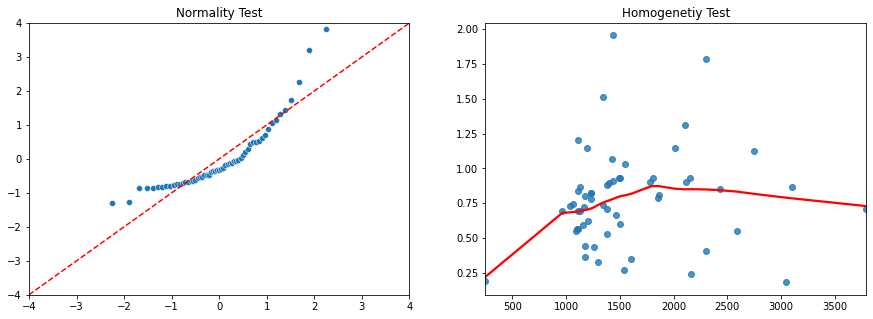

In [ ]:
### Regression 가정 검정

### Ressidual
import scipy.stats

X = basic_pls.iloc[:, 1:]
y = basic_pls.iloc[:, 0]

basic_fitted = basic_pls_reg.predict(X)
basic_residual = basic_pls_reg.resid


### 정규성
basic_shapiro = np.round(scipy.stats.shapiro(basic_residual)[1], 3)
print("Shapiro test p-value : ", basic_shapiro)

sr = scipy.stats.zscore(basic_residual)
(x, y),_ = scipy.stats.probplot(sr)


### 독립성
  # Durbon-Watson
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson test : ", np.round(durbin_watson(basic_residual), 3)) # 1.5 ~ 2.5이면 독립


### 등분산성
import statsmodels.stats.api as sms
bp_test = sms.het_breuschpagan(basic_pls_reg.resid, basic_pls_reg.model.exog)
print("BP test p-value : ", np.round(bp_test[1], 3))


### Plots

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = x, y = y)
plt.title("Normality Test")
plt.ylim(-4, 4) ; plt.xlim(-4, 4)
plt.plot([-4, 4], [-4, 4], linestyle = "--", color = "red")


plt.subplot(1, 2, 2)
sns.regplot(x = basic_fitted, y = np.sqrt(np.abs(sr)), lowess = True, line_kws = {"color" : "red"})
plt.title("Homogenetiy Test")

plt.show()

#### **2) Log**

##### **- Summary**

In [ ]:
from statsmodels.formula.api import ols

log_pls_reg = ols("log_ou ~ " + " + ".join(log_pls.columns[1:]), data = log_pls).fit()
log_pls_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_ou   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     6.955
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           5.09e-05
Time:                        11:20:12   Log-Likelihood:                -65.126
No. Observations:                  57   AIC:                             142.3
Df Residuals:                      51   BIC:                             154.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9195      0.106     65.146      0.000       6.706       7.133
log_comp1      0.1648      0.044      3.734      0.000       0.076       0.253
log_comp2      0.3329      0.091      3.675      0.001       0.151       0.515
log_comp3     -0.4010      0.163     -2.454      0.018      -0.729      -0.073
log_comp4     -0.0820      0.104     -0.790      0.433      -0.290       0.126
log_comp5     -0.1877      0.227     -0.827      0.412      -0.643       0.268
==============================================================================
Omnibus:                        0.172   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.007
Skew:                           0.026   Prob(JB):                        0.997
Kurtosis:                       3.003   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### **- Correlation**

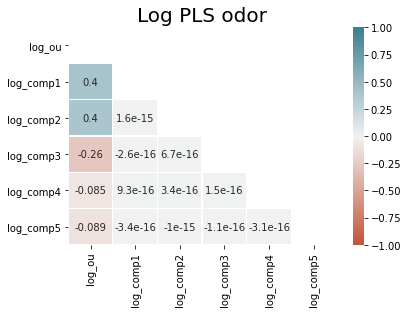

In [ ]:
log_pls_corr = log_pls.corr()

### 그래프의 윗부분을 공백화
mask = np.zeros_like(log_pls_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (25,12))

### Basic 
sns.heatmap(log_pls_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Log PLS odor", fontsize = 20)

plt.show()

##### **- 가설 검정**

Shapiro test p-value :  0.727
Durbin-Watson test :  2.016
BP test p-value :  0.81


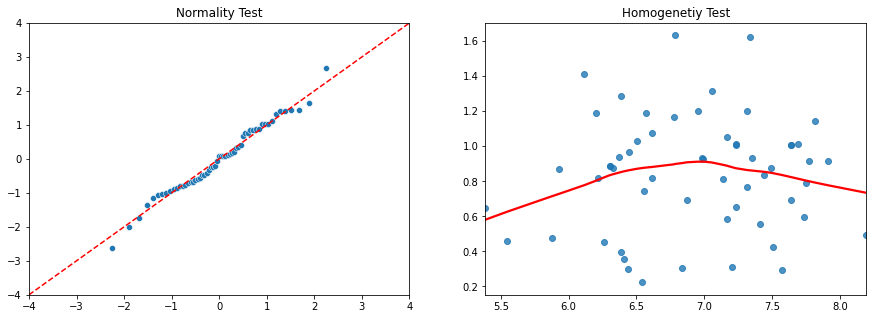

In [ ]:
### Regression 가정 검정

### Ressidual
import scipy.stats

X = log_pls.iloc[:, 1:]
y = log_pls.iloc[:, 0]

log_fitted = log_pls_reg.predict(X)
log_residual = log_pls_reg.resid


### 정규성
log_shapiro = np.round(scipy.stats.shapiro(log_residual)[1], 3)
print("Shapiro test p-value : ", log_shapiro)

sr = scipy.stats.zscore(log_residual)
(x, y),_ = scipy.stats.probplot(sr)


### 독립성
  # Durbon-Watson
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson test : ", np.round(durbin_watson(log_residual), 3)) # 1.5 ~ 2.5이면 독립


### 등분산성
import statsmodels.stats.api as sms
bp_test = sms.het_breuschpagan(log_pls_reg.resid, log_pls_reg.model.exog)
print("BP test p-value : ", np.round(bp_test[1], 3))


### Plots

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = x, y = y)
plt.title("Normality Test")
plt.ylim(-4, 4) ; plt.xlim(-4, 4)
plt.plot([-4, 4], [-4, 4], linestyle = "--", color = "red")


plt.subplot(1, 2, 2)
sns.regplot(x = log_fitted, y = np.sqrt(np.abs(sr)), lowess = True, line_kws = {"color" : "red"})
plt.title("Homogenetiy Test")

plt.show()

### **2. PCA**

#### **1) Basic**

##### **- Summary**

In [ ]:
from statsmodels.formula.api import ols

basic_pca_reg = ols("ou ~ " + " + ".join(basic_pca.columns[1:]), data = basic_pca).fit()
basic_pca_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ou   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.918
Date:                Mon, 13 Sep 2021   Prob (F-statistic):              0.107
Time:                        11:20:12   Log-Likelihood:                -493.12
No. Observations:                  57   AIC:                             998.2
Df Residuals:                      51   BIC:                             1011.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1579.6491    193.720      8.154      0.000    1190.741    1968.558
comp1        133.2055     66.527      2.002      0.051      -0.352     266.763
comp2       -339.1991    155.090     -2.187      0.033    -650.556     -27.843
comp3        -22.0109    182.000     -0.121      0.904    -387.390     343.369
comp4         84.6016    201.439      0.420      0.676    -319.803     489.007
comp5       -165.3698    212.042     -0.780      0.439    -591.062     260.323
==============================================================================
Omnibus:                       30.711   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.453
Skew:                           1.779   Prob(JB):                     2.03e-13
Kurtosis:                       6.458   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### **- Correlation**

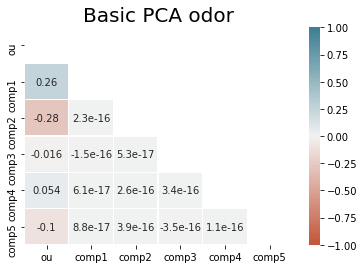

In [ ]:
basic_pca_corr = basic_pca.corr()

### 그래프의 윗부분을 공백화
mask = np.zeros_like(basic_pca_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (25,12))

### Basic 
sns.heatmap(basic_pca_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Basic PCA odor", fontsize = 20)

plt.show()

##### **- 가설검정**

Shapiro test p-value :  0.0
Durbin-Watson test :  1.635
BP test p-value :  0.711


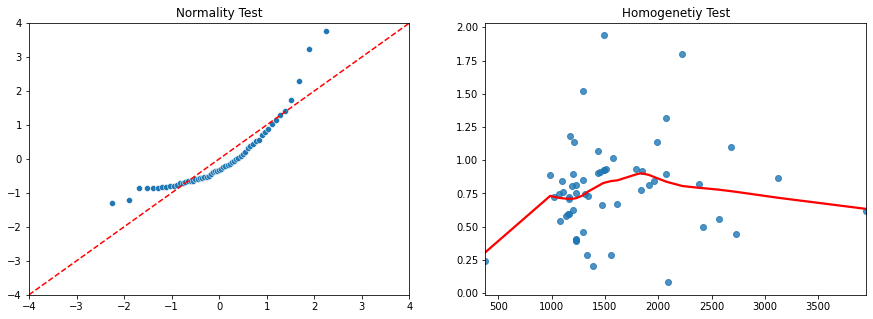

In [ ]:
### Regression 가정 검정

### Ressidual
import scipy.stats

X = basic_pca.iloc[:, 1:]
y = basic_pca.iloc[:, 0]

basic_fitted = basic_pca_reg.predict(X)
basic_residual = basic_pca_reg.resid


### 정규성
basic_shapiro = np.round(scipy.stats.shapiro(basic_residual)[1], 3)
print("Shapiro test p-value : ", basic_shapiro)

sr = scipy.stats.zscore(basic_residual)
(x, y),_ = scipy.stats.probplot(sr)


### 독립성
  # Durbon-Watson
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson test : ", np.round(durbin_watson(basic_residual), 3)) # 1.5 ~ 2.5이면 독립


### 등분산성
import statsmodels.stats.api as sms
bp_test = sms.het_breuschpagan(basic_pca_reg.resid, basic_pca_reg.model.exog)
print("BP test p-value : ", np.round(bp_test[1], 3))


### Plots

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = x, y = y)
plt.title("Normality Test")
plt.ylim(-4, 4) ; plt.xlim(-4, 4)
plt.plot([-4, 4], [-4, 4], linestyle = "--", color = "red")


plt.subplot(1, 2, 2)
sns.regplot(x = basic_fitted, y = np.sqrt(np.abs(sr)), lowess = True, line_kws = {"color" : "red"})
plt.title("Homogenetiy Test")

plt.show()

#### **2) Log**

##### **- Summary**

In [ ]:
from statsmodels.formula.api import ols

log_pca_reg = ols("log_ou ~ " + " + ".join(log_pca.columns[1:]), data = log_pca).fit()
log_pca_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_ou   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2.697
Date:                Mon, 13 Sep 2021   Prob (F-statistic):             0.0240
Time:                        11:20:13   Log-Likelihood:                -71.953
No. Observations:                  57   AIC:                             157.9
Df Residuals:                      50   BIC:                             172.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9195      0.121     57.224      0.000       6.677       7.162
log_comp1     -0.1094      0.044     -2.490      0.016      -0.198      -0.021
log_comp2     -0.1227      0.098     -1.256      0.215      -0.319       0.073
log_comp3      0.3039      0.106      2.873      0.006       0.091       0.516
log_comp4      0.0329      0.128      0.256      0.799      -0.225       0.291
log_comp5     -0.0225      0.142     -0.159      0.874      -0.307       0.262
log_comp6     -0.0372      0.153     -0.243      0.809      -0.344       0.270
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.364
Skew:                           0.019   Prob(JB):                        0.834
Kurtosis:                       2.610   Cond. No.                         3.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### **- Correlation**

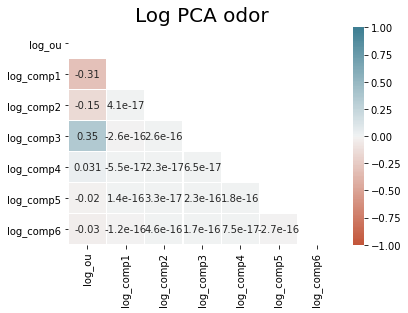

In [ ]:
log_pca_corr = log_pca.corr()

### 그래프의 윗부분을 공백화
mask = np.zeros_like(log_pca_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (25,12))

### Basic 
sns.heatmap(log_pca_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Log PCA odor", fontsize = 20)

plt.show()

##### **- 가설 검정**

Shapiro test p-value :  0.821
Durbin-Watson test :  1.835
BP test p-value :  0.629


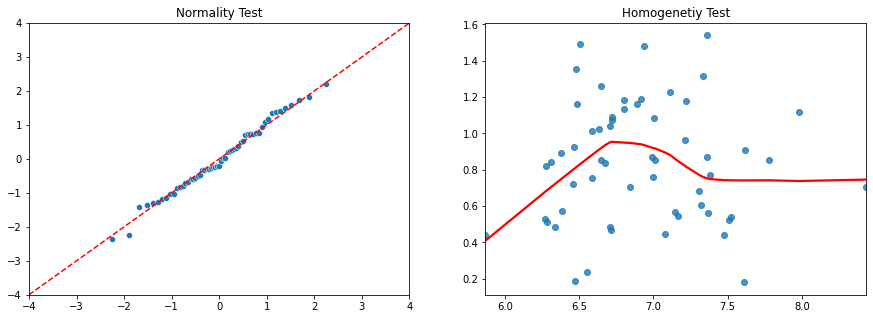

In [ ]:
### Regression 가정 검정

### Ressidual
import scipy.stats

X = log_pca.iloc[:, 1:]
y = log_pca.iloc[:, 0]

log_fitted = log_pca_reg.predict(X)
log_residual = log_pca_reg.resid


### 정규성
log_shapiro = np.round(scipy.stats.shapiro(log_residual)[1], 3)
print("Shapiro test p-value : ", log_shapiro)

sr = scipy.stats.zscore(log_residual)
(x, y),_ = scipy.stats.probplot(sr)


### 독립성
  # Durbon-Watson
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson test : ", np.round(durbin_watson(log_residual), 3)) # 1.5 ~ 2.5이면 독립


### 등분산성
import statsmodels.stats.api as sms
bp_test = sms.het_breuschpagan(log_pca_reg.resid, log_pca_reg.model.exog)
print("BP test p-value : ", np.round(bp_test[1], 3))


### Plots

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = x, y = y)
plt.title("Normality Test")
plt.ylim(-4, 4) ; plt.xlim(-4, 4)
plt.plot([-4, 4], [-4, 4], linestyle = "--", color = "red")


plt.subplot(1, 2, 2)
sns.regplot(x = log_fitted, y = np.sqrt(np.abs(sr)), lowess = True, line_kws = {"color" : "red"})
plt.title("Homogenetiy Test")

plt.show()

## **IV. Result**

### **1. Def LOOCV**

In [ ]:
def reg_loocv(data) :

  from statsmodels.formula.api import ols
  
  predict = []
  real = []

  for i in range(0, data.shape[0]) :
    train = data.drop(data.index[i]) 
    test = pd.DataFrame(data.iloc[i, :]).T
  
    train_y = train.iloc[:, 0]
    train_X = train.iloc[:, 1:]

    test_y = test.iloc[:, 0].values
    test_X = test.iloc[:, 1:]

    reg_fit = ols(train_y.name + "~" + " + ".join(train_X.columns), data = train).fit()

    pred = np.round(reg_fit.predict(test_X).values[0], 3)
    predict.append(pred)
    real.append(test_y[0])  

  return {"predict" : predict, "real" : real}

### **2. Results**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

### Basic PLS
result1 = reg_loocv(data = basic_pls)
pred1 = result1["predict"]
real1 = result1["real"]

dif1 = np.round([real1[i] - pred1[i] for i in range(len(real1))], 3)
result_values1 = pd.DataFrame([real1, pred1, dif1], index = ["Real", "Predict", "Diff"]).T

cal_r2_1 = np.round(np.corrcoef(pred1, real1)[0, 1]**2, 3)
bif_r2_1 = np.round(r2_score(pred1, real1), 3)
rmse1 = np.round(rmse(pred1, real1), 3)
mae1 = np.round(mae(pred1, real1), 3)


### Log PLS
result2 = reg_loocv(data = log_pls)
pred2 = result2["predict"]
real2 = result2["real"]
exp_pred2 = np.exp(pred2)
exp_real2 = np.exp(real2)

dif2 = np.round([real2[i] - pred2[i] for i in range(len(real2))], 3)
result_values2 = pd.DataFrame([real2, pred2, dif2], index = ["Real", "Predict", "Diff"]).T

exp_dif2 = np.round([exp_real2[i] - exp_pred2[i] for i in range(len(exp_real2))], 3)
exp_result_values2 = pd.DataFrame([exp_real2, exp_pred2, exp_dif2], index = ["Exp Real", "Exp Predict", "Exp Diff"]).T

cal_r2_2 = np.round(np.corrcoef(pred2, real2)[0, 1]**2, 3)
exp_cal_r2_2 = np.round(np.corrcoef(exp_pred2, exp_real2)[0, 1]**2, 3)
bif_r2_2 = np.round(r2_score(pred2, real2), 3)
rmse2 = np.round(rmse(pred2, real2), 3)
mae2 = np.round(mae(pred2, real2), 3)


### Basic PCA
result3 = reg_loocv(data = basic_pca)
pred3 = result3["predict"]
real3 = result3["real"]

dif3 = np.round([real3[i] - pred3[i] for i in range(len(real3))], 3)
result_values3 = pd.DataFrame([real3, pred3, dif3], index = ["Real", "Predict", "Diff"]).T

cal_r2_3 = np.round(np.corrcoef(pred3, real3)[0, 1]**2, 3)
bif_r2_3 = np.round(r2_score(pred3, real3), 3)
rmse3 = np.round(rmse(pred3, real3), 3)
mae3 = np.round(mae(pred3, real3), 3)


### Log PCA
result4 = reg_loocv(data = log_pca)
pred4 = result4["predict"]
real4 = result4["real"]
exp_pred4 = np.exp(pred4)
exp_real4 = np.exp(real4)

dif4 = np.round([real4[i] - pred4[i] for i in range(len(real4))], 3)
result_values4 = pd.DataFrame([real4, pred4, dif4], index = ["Real", "Predict", "Diff"]).T

exp_dif4 = np.round([exp_real4[i] - exp_pred4[i] for i in range(len(exp_real4))], 3)
exp_result_values4 = pd.DataFrame([exp_real4, exp_pred4, exp_dif4], index = ["Exp Real", "Exp Predict", "Exp Diff"]).T

cal_r2_4 = np.round(np.corrcoef(pred4, real4)[0, 1]**4, 3)
exp_cal_r2_4 = np.round(np.corrcoef(exp_pred4, exp_real4)[0, 1]**4, 3)
bif_r2_4 = np.round(r2_score(pred4, real4), 3)
rmse4 = np.round(rmse(pred4, real4), 3)
mae4 = np.round(mae(pred4, real4), 3)


display(result_values1.head(3))
display(result_values2.head(3))
display(exp_result_values2.head(3))
display(result_values3.head(3))
display(result_values4.head(3))
display(exp_result_values4.head(3))

,Real,Predict,Diff
0,300.0,989.342,-689.342
1,300.0,221.892,78.108
2,448.0,1152.175,-704.175


,Real,Predict,Diff
0,5.703782,5.932,-0.228
1,5.703782,6.313,-0.609
2,6.104793,6.710,-0.605


,Exp Real,Exp Predict,Exp Diff
0,300.0,376.907576,-76.908
1,300.0,551.697561,-251.698
2,448.0,820.570639,-372.571


,Real,Predict,Diff
0,300.0,1058.763,-758.763
1,300.0,1185.459,-885.459
2,448.0,1225.065,-777.065


,Real,Predict,Diff
0,5.703782,5.932,-0.228
1,5.703782,7.158,-1.454
2,6.104793,6.670,-0.565


,Exp Real,Exp Predict,Exp Diff
0,300.0,376.907576,-76.908
1,300.0,1284.339683,-984.340
2,448.0,788.395604,-340.396


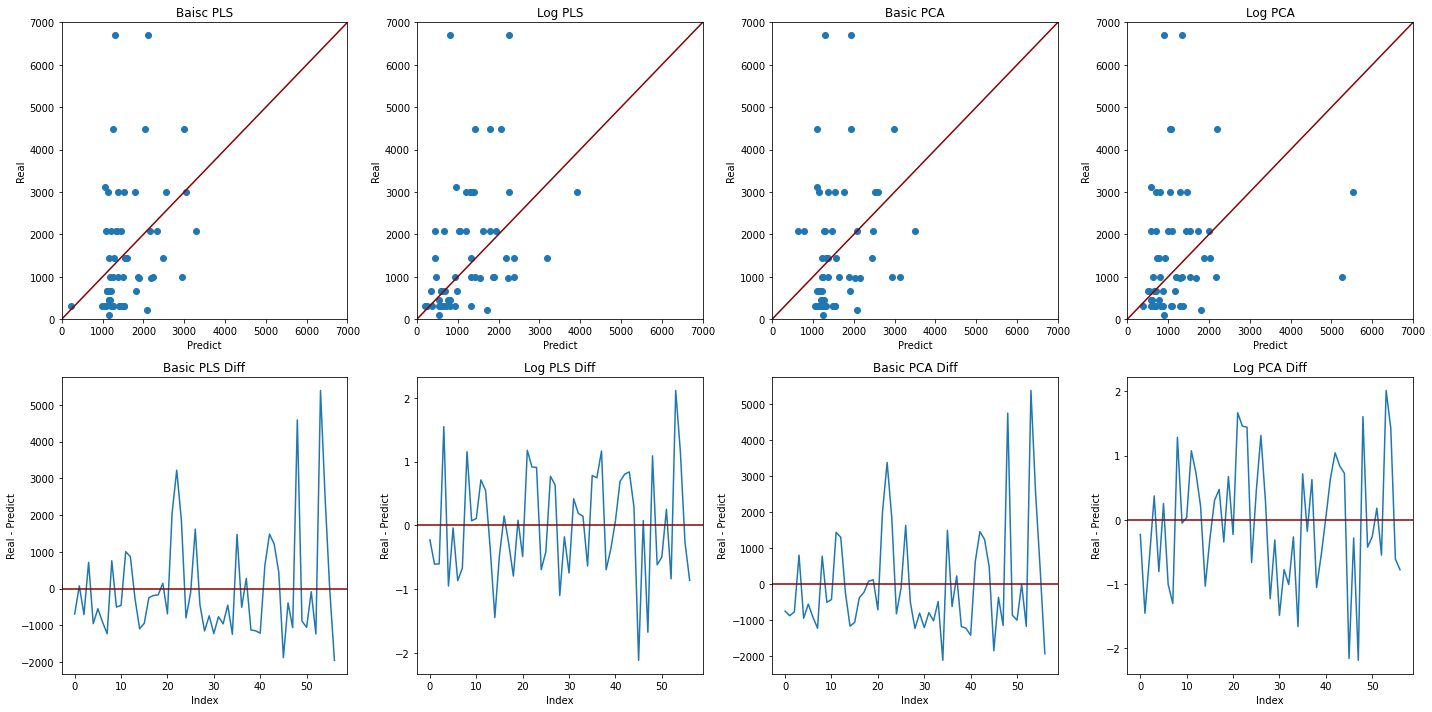

In [ ]:
plt.figure(figsize = (20, 10))


### Predict vs Real
plt.subplot(2, 4, 1)
plt.scatter(pred1, real1)
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("Predict") ; plt.ylabel("Real")
plt.xlim(0, 7000) ; plt.ylim(0, 7000)
plt.title("Baisc PLS")

plt.subplot(2, 4, 2)
# plt.scatter(pred2, real2)
plt.scatter(exp_pred2, exp_real2)
# plt.plot((5, 10), (5, 10), color = "darkred")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("Predict") ; plt.ylabel("Real")
# plt.xlim(5, 10) ; plt.ylim(5, 10)
plt.xlim(0, 7000) ; plt.ylim(0, 7000)
plt.title("Log PLS")

plt.subplot(2, 4, 3)
plt.scatter(pred3, real3)
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("Predict") ; plt.ylabel("Real")
plt.xlim(0, 7000) ; plt.ylim(0, 7000)
plt.title("Basic PCA")

plt.subplot(2, 4, 4)
# plt.scatter(pred4, real4)
plt.scatter(exp_pred4, exp_real4)
# plt.plot((5, 10), (5, 10), color = "darkred")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("Predict") ; plt.ylabel("Real")
# plt.xlim(5, 10) ; plt.ylim(5, 10)
plt.xlim(0, 7000) ; plt.ylim(0, 7000)
plt.title("Log PCA")


### Real - Predict
plt.subplot(2, 4, 5)
plt.plot(dif1)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Basic PLS Diff")

plt.subplot(2, 4, 6)
plt.plot(dif2)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Log PLS Diff")

plt.subplot(2, 4, 7)
plt.plot(dif3)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Basic PCA Diff")

plt.subplot(2, 4, 8)
plt.plot(dif4)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Log PCA Diff")

plt.tight_layout()
plt.show()

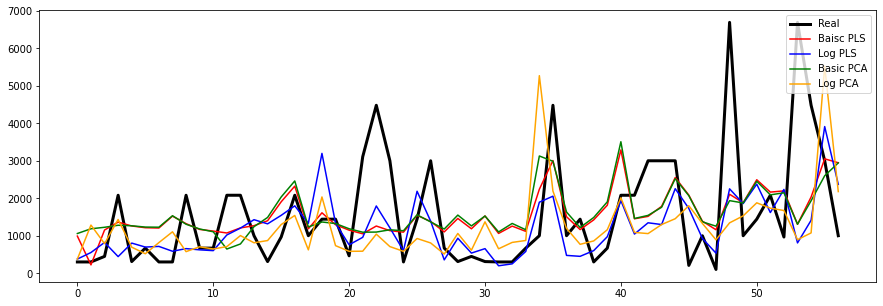

In [ ]:
# plt.figure(figsize = (15, 10))
plt.figure(figsize = (15, 5))

# plt.subplot(2, 1, 1)
plt.plot(real1, color = "black", linewidth = 3)
plt.plot(pred1, color = "red")
plt.plot(exp_pred2, color = "blue")
plt.plot(pred3, color = "green")
plt.plot(exp_pred4, color = "orange")
plt.legend(loc = "upper right", labels = ["Real", "Baisc PLS", "Log PLS", "Basic PCA", "Log PCA"])

# plt.subplot(2, 1, 2)
# plt.plot(real1, color = "black", linewidth = 3)
# plt.plot(pred1, color = "red")
# plt.plot(exp_pred2, color = "blue")
# plt.plot(pred3, color = "green")
# # plt.plot(pred4, color = "orange")
# plt.legend(loc = "upper right", labels = ["Real", "Baisc PLS", "Log PLS", "Basic PCA"]) #, "Log PCA"])

plt.show()

In [ ]:
cal_r2 = [cal_r2_1, cal_r2_2, cal_r2_3, cal_r2_4]
exp_cal_r2 = [cal_r2_1, exp_cal_r2_2, cal_r2_3, exp_cal_r2_4]
bif_r2 = [bif_r2_1, bif_r2_2, bif_r2_3, bif_r2_4]
rmse = [rmse1, rmse2, rmse3, rmse4]
mae = [mae1, mae2, mae3, mae4]

result_set = pd.DataFrame([cal_r2, exp_cal_r2, bif_r2, rmse, mae], 
                          index = ["Cal R2", "Exp Cal R2", "Built-in R2", "RMSE", "MAE"],
                          columns = ["Basic PLS", "Log PLS", "Basic PCA", "Log PCA"])
result_set

,Basic PLS,Log PLS,Basic PCA,Log PCA
Cal R2,0.099,0.294,0.041,0.006
Exp Cal R2,0.099,0.150,0.041,0.000
Built-in R2,-4.859,-0.704,-5.333,-2.581
RMSE,2062763.952,0.694,2265749.847,0.948
MAE,1056.870,0.686,1138.772,0.800


In [ ]:
exp_cal_r2 = [cal_r2_1, exp_cal_r2_2, cal_r2_3, exp_cal_r2_4]
rmse = [rmse1, rmse2, rmse3, rmse4]
mae = [mae1, mae2, mae3, mae4]

result_set2 = pd.DataFrame([exp_cal_r2, rmse, mae], 
                           index = ["Exp Cal R2", "RMSE", "MAE"],
                           columns = ["Basic PLS", "(Exp) Log PLS", "Basic PCA", "(Exp) Log PCA"])
result_set2

,Basic PLS,(Exp) Log PLS,Basic PCA,(Exp) Log PCA
Exp Cal R2,0.099,0.150,0.041,0.000
RMSE,2062763.952,0.694,2265749.847,0.948
MAE,1056.870,0.686,1138.772,0.800
